# Analisis de datos  Con K-means de un data set de "Credit Card Approval"



integrantes
Javier Briones
Gabriel Gonzalez
Luis Rodriguez

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


# 1. Comprensión de los datos

Aquí se leerá el dataset.

In [3]:
CC_data = pd.read_csv("default of credit card clients.csv")
CC_data2 = CC_data.copy()

Se generará estadísticas descriptivas del dataset.

In [4]:
CC_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Se comprueba que los datos no presenten si hay valores nulos y los suma.

In [5]:
CC_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## 2. Descripción, distribución y Visualizacion de los datos

# Grafica de Dispersion de las variables.
Aqui se muestra la grafica que creimos que eran mas representativas para mostrar los datos 



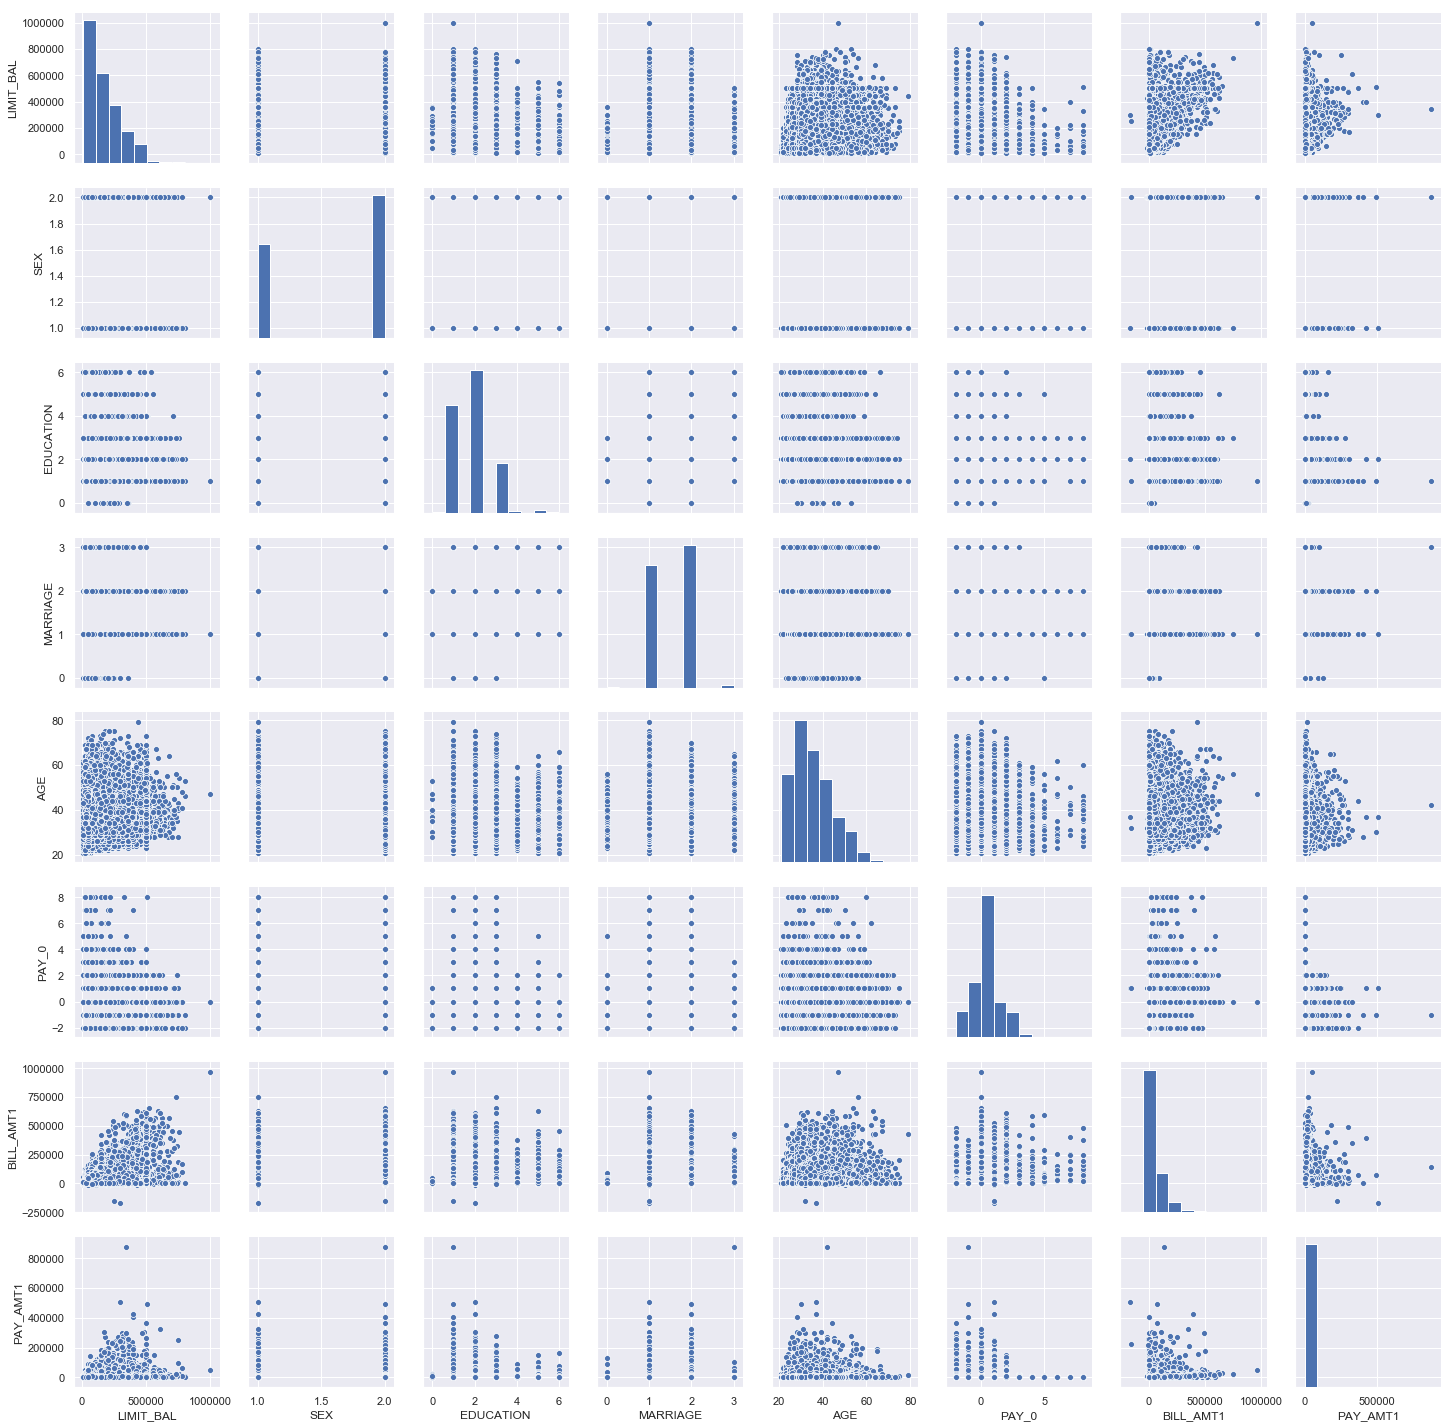

In [6]:
sns.set()
cols = ['LIMIT_BAL',
        'SEX',
        'EDUCATION',
        'MARRIAGE',
        'AGE',
        'PAY_0',
        #'PAY_2',
        #'PAY_3',
        #'PAY_4',
        #'PAY_5',          
        #'PAY_6'         
        'BILL_AMT1',       
        #'BILL_AMT2',   
        #'BILL_AMT3',
        #'BILL_AMT4',
        #'BILL_AMT5',
        #'BILL_AMT6',
        'PAY_AMT1'
        #'PAY_AMT2',
        #'PAY_AMT3',
        #'PAY_AMT4',
        #'PAY_AMT5',
        #'default payment next month'
]
sns.pairplot(CC_data[cols], size = 2.5 )
plt.show();

Se muestra el recuento de los que pagaron (1) y los que no pagaron (0) .

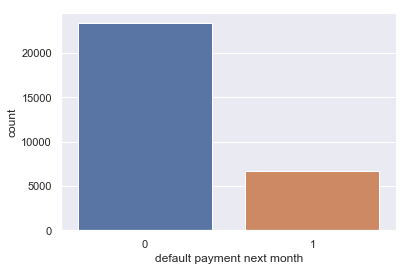

In [7]:
sns.countplot(data = CC_data, x = 'default payment next month')

In [8]:
print("shape of the data:", CC_data.shape)

shape of the data: (30000, 25)


In [9]:
CC_data.tail(15)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29985,29986,240000,1,1,2,30,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29986,29987,360000,1,1,2,35,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29987,29988,130000,1,1,2,34,0,0,0,0,...,108047,93708,97353,3000,2000,93000,4000,5027,4005,0
29988,29989,250000,1,1,1,34,0,0,0,0,...,245750,175005,179687,65000,8800,9011,6000,7000,6009,0
29989,29990,150000,1,1,2,35,-1,-1,-1,-1,...,780,0,0,9054,0,783,0,0,0,0
29990,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29992,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29994,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1


In [10]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [11]:
print(CC_data.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


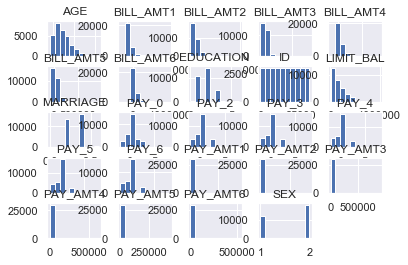

In [12]:
CC_data.drop(['default payment next month'],1).hist()
plt.show()

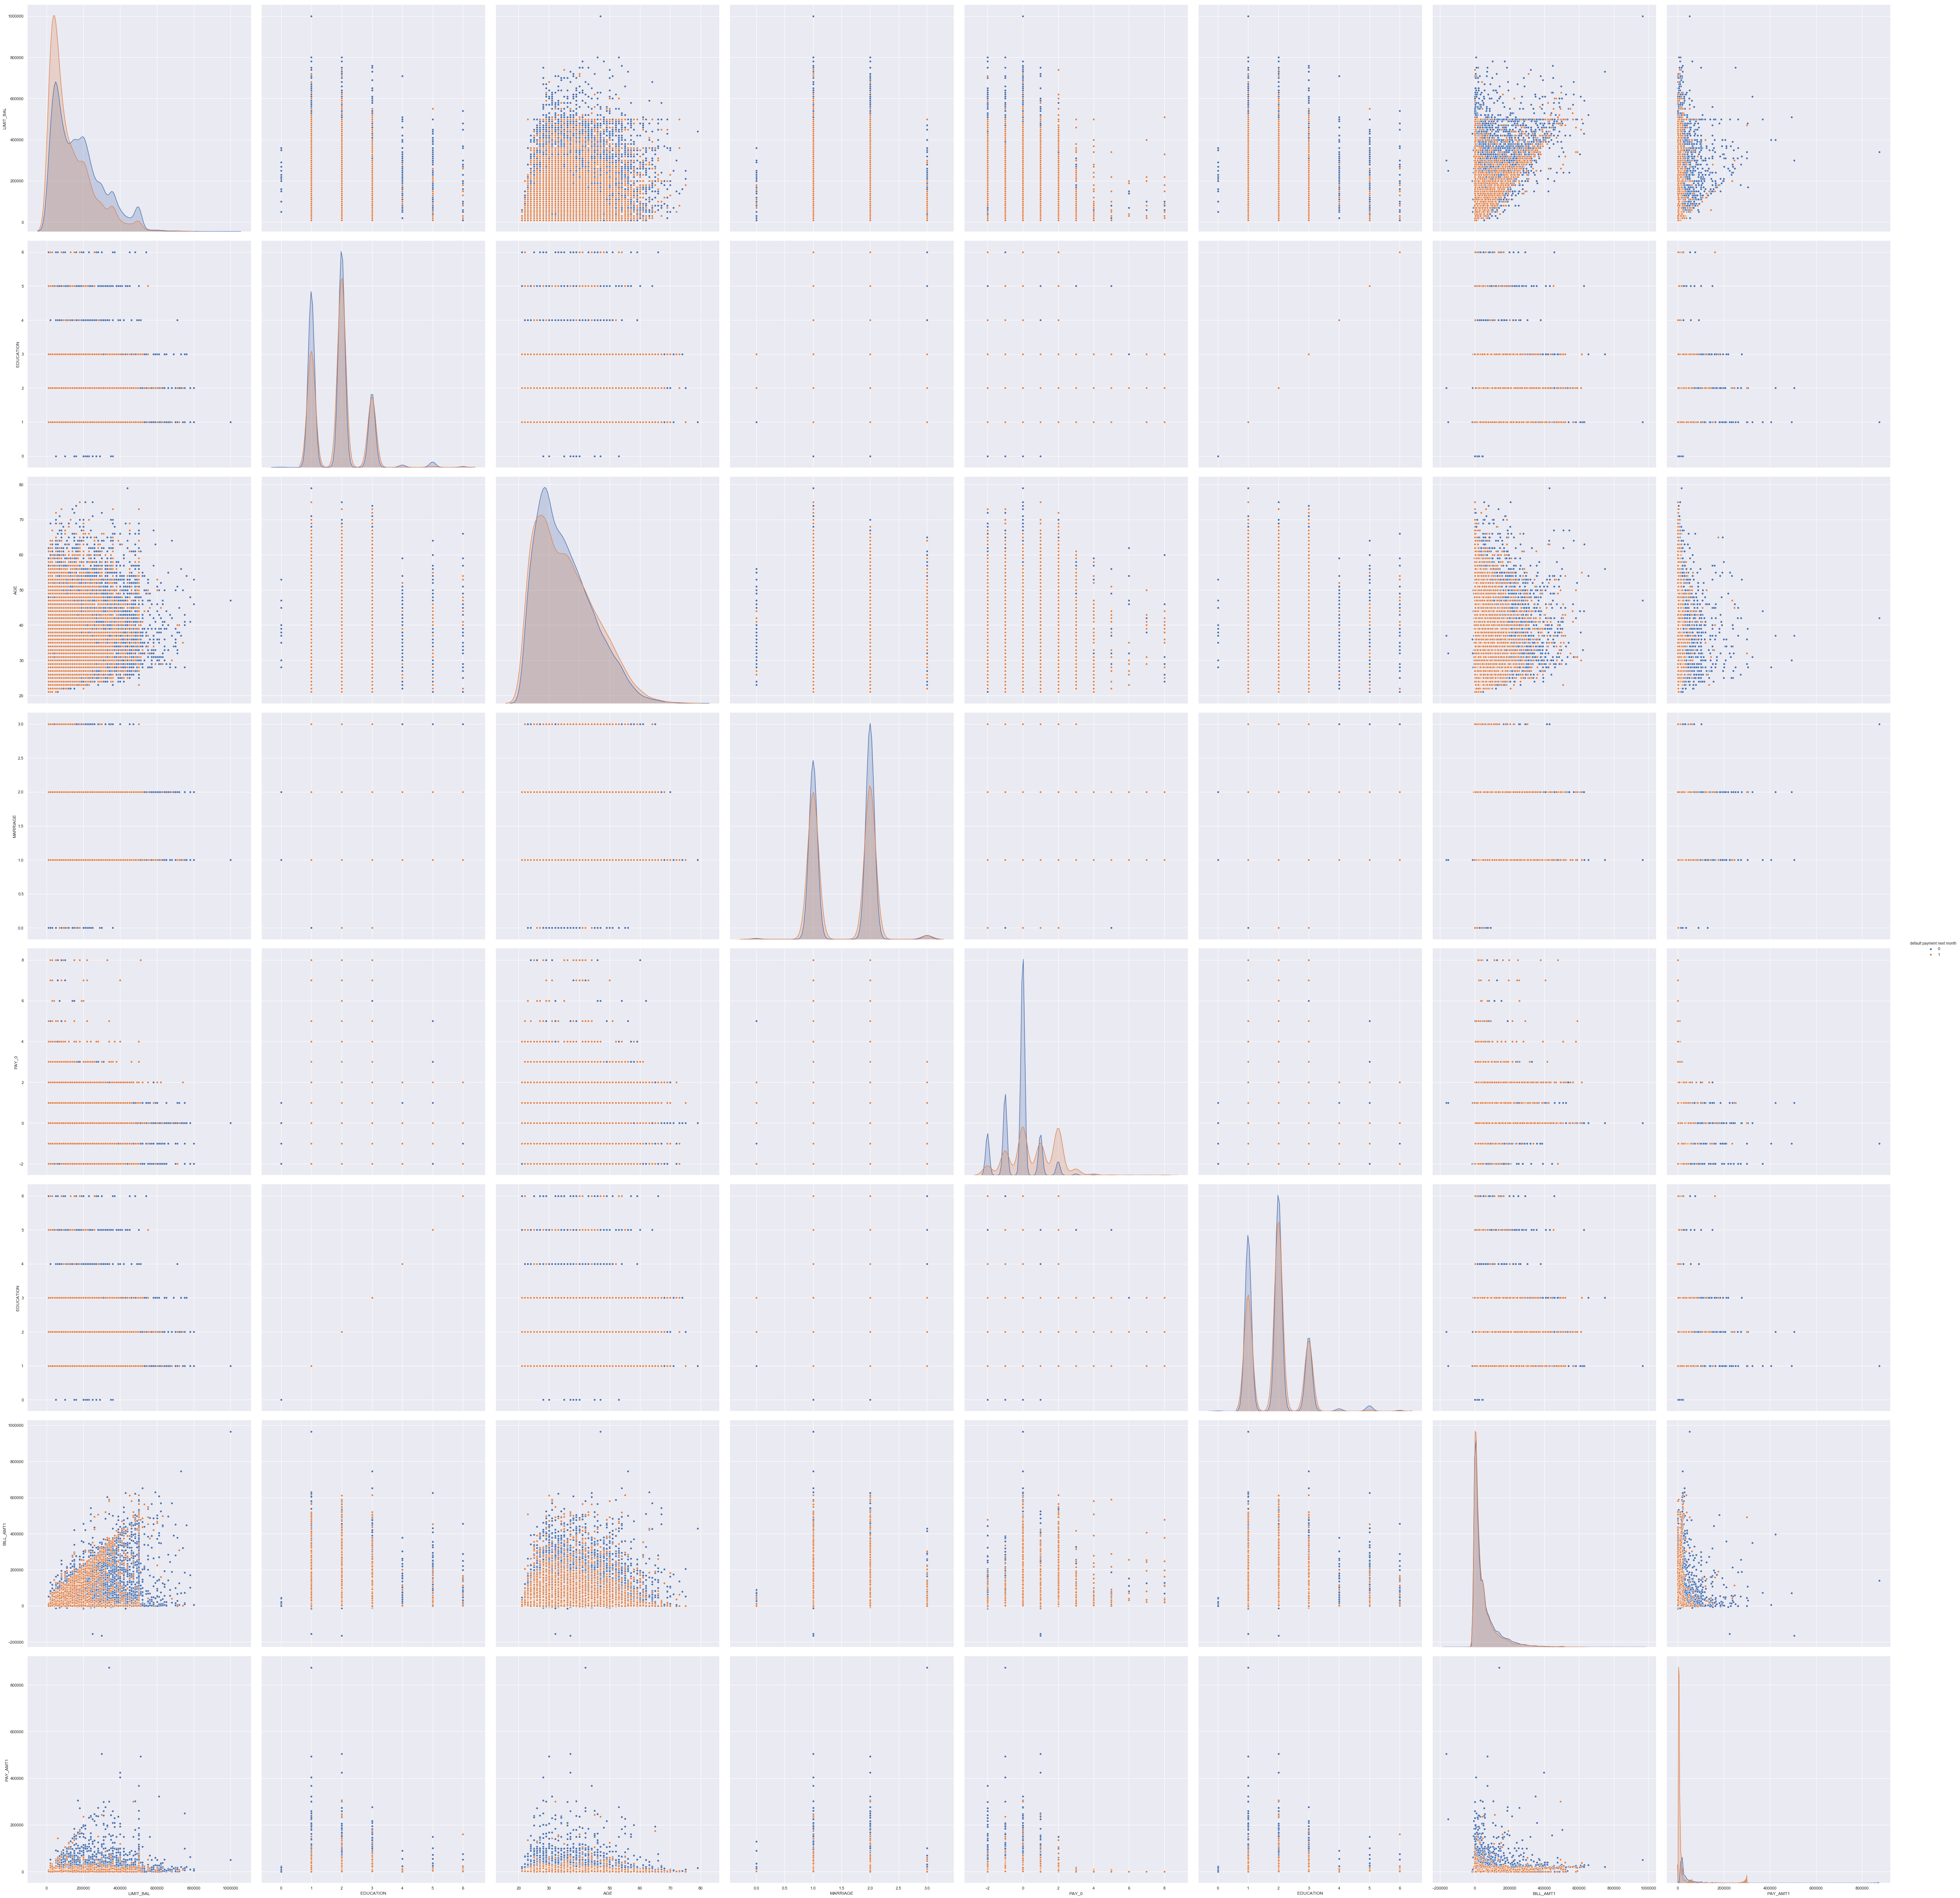

In [13]:
sns.pairplot(CC_data.dropna(), hue='default payment next month',size=9,vars=["LIMIT_BAL","EDUCATION","AGE","MARRIAGE","PAY_0","EDUCATION","BILL_AMT1","PAY_AMT1",],kind='scatter')

       

# Definir entrada

In [14]:
X = np.array(CC_data[["LIMIT_BAL","EDUCATION","AGE","PAY_0","BILL_AMT1","PAY_AMT1"]])
y = np.array(CC_data['default payment next month'])
X.shape

(30000, 6)

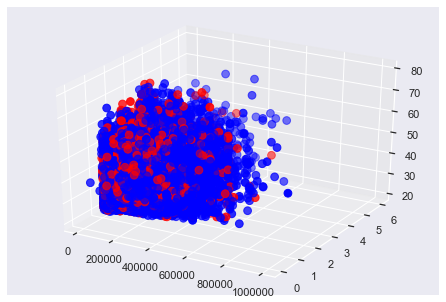

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

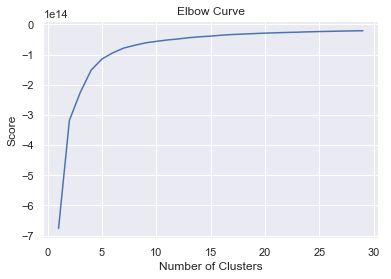

In [16]:
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Eligimos k = 5 por la curva

# K=5

In [17]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 5.96745022e+04  2.02228452e+00  3.43272231e+01  3.05873050e-01
   3.03595665e+04  2.95924959e+03]
 [ 2.10142626e+05  1.66671152e+00  3.59257266e+01 -5.32292788e-01
   1.39277578e+04  5.66814411e+03]
 [ 3.92843604e+05  1.74308653e+00  3.79928635e+01  2.47992864e-01
   3.05969030e+05  1.58714523e+04]
 [ 1.88429439e+05  1.91274659e+00  3.60381892e+01  3.02225594e-01
   1.45659629e+05  7.58606930e+03]
 [ 4.04017309e+05  1.55164712e+00  3.76756002e+01 -6.34561697e-01
   2.56637200e+04  1.08398747e+04]]


In [19]:
type(label)


NameError: name 'label' is not defined

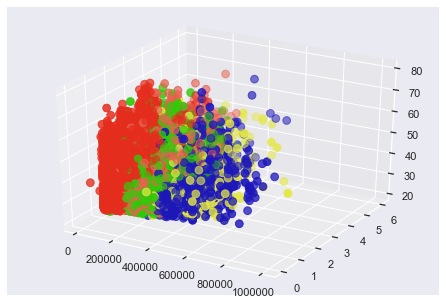

In [17]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['#32c909','#e52d1d','#1d17ba','#e96350','#e4e846']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [18]:
copy =  pd.DataFrame()
copy['ID']=CC_data['ID'].values
copy['default payment next month']=CC_data['default payment next month'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,#32c909,7436
1,#e52d1d,13907
2,#1d17ba,3582
3,#e96350,3954
4,#e4e846,1121


In [24]:
CC_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
type(CC_data)

pandas.core.frame.DataFrame

In [19]:
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Pagar']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('default payment next month').size()
diversidadGrupo

,Pagar,cantidad
0,0,6249
1,1,1187


In [22]:
Dataframe.header()

NameError: name 'Dataframe' is not defined

In [20]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([25651, 13954,  5596,  2762,   431], dtype=int64)

In [21]:

users=CC_data['ID'].values
for row in closest:
    print(users[row])

25652
13955
5597
2763
432


# k=10

In [22]:
kmeans = KMeans(n_clusters=10).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.63165880e+05  1.76506024e+00  3.75120482e+01  2.13253012e-01
   2.61814418e+05  1.56063301e+04]
 [ 1.45271238e+05  1.75818833e+00  3.48671955e+01 -3.80757421e-01
   1.13552784e+04  4.75644729e+03]
 [ 3.42099105e+05  1.58981418e+00  3.69053682e+01 -6.32828630e-01
   1.98027509e+04  8.78519993e+03]
 [ 7.23638883e+04  2.03167690e+00  3.49025935e+01  4.26648188e-01
   5.63365114e+04  3.25115304e+03]
 [ 2.35232558e+05  1.83837209e+00  3.64616279e+01  2.79069767e-01
   1.82421078e+05  9.05875465e+03]
 [ 2.28239300e+05  1.62718872e+00  3.63329280e+01 -5.66877432e-01
   1.37152899e+04  5.96993166e+03]
 [ 3.82675687e+04  2.05550186e+00  3.38577937e+01  3.08297667e-01
   1.39113296e+04  2.51529311e+03]
 [ 4.87449210e+05  1.51768247e+00  3.89224981e+01 -6.51617758e-01
   3.16774597e+04  1.20810602e+04]
 [ 1.49725296e+05  1.96604349e+00  3.56982068e+01  3.38420450e-01
   1.14329072e+05  6.14803167e+03]
 [ 4.82821429e+05  1.66071429e+00  3.92464286e+01  3.25000000e-01
   4.29421036e+05  2.1061

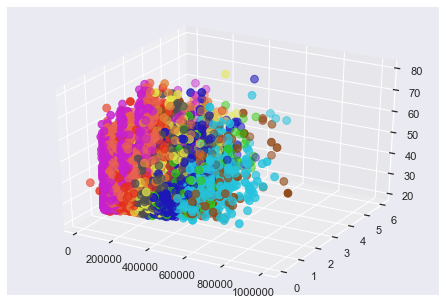

In [23]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['#32c909','#e52d1d','#1d17ba','#e96350','#e4e846','#4f4f4f','#c720ce','#25c3dd','#e08538','#914a17']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [24]:
copy =  pd.DataFrame()
copy['ID']=CC_data['ID'].values
copy['default payment next month']=CC_data['default payment next month'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,#32c909,830
1,#e52d1d,3907
2,#1d17ba,2906
3,#e96350,5045
4,#e4e846,1721
5,#4f4f4f,4113
6,#c720ce,7239
7,#25c3dd,1329
8,#e08538,2630
9,#914a17,280


In [25]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('default payment next month').size()
diversidadGrupo

,categoria,cantidad
0,0,681
1,1,149


In [26]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 5649, 18594, 23566,  5604, 14361,  7016, 29112,  8002, 15855,
        9111], dtype=int64)

In [27]:
users=CC_data['ID'].values
for row in closest:
    print(users[row])

5650
18595
23567
5605
14362
7017
29113
8003
15856
9112


# k=15

In [28]:
kmeans = KMeans(n_clusters=15).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.08193833e+05  1.64730176e+00  3.58931718e+01 -5.51762115e-01
   1.21399964e+04  4.40908756e+03]
 [ 9.37213599e+04  2.00517369e+00  3.49168514e+01  4.56393200e-01
   7.73718211e+04  3.89534220e+03]
 [ 2.21726872e+05  1.87224670e+00  3.66555066e+01  3.30396476e-01
   2.01027686e+05  8.64646344e+03]
 [ 4.97390057e+05  1.49521989e+00  3.93795411e+01 -7.11281071e-01
   2.20682228e+04  1.11638098e+04]
 [ 2.85669557e+05  1.59826590e+00  3.70558767e+01 -6.92196532e-01
   1.09968887e+04  5.37024759e+03]
 [ 3.27693580e+05  1.82689076e+00  3.75647059e+01  2.72268908e-01
   2.93915950e+05  1.36345025e+04]
 [ 1.60956322e+05  1.96275862e+00  3.58206897e+01  3.15402299e-01
   1.20632097e+05  6.61418529e+03]
 [ 2.32295199e+04  2.10580368e+00  3.37098161e+01  4.79579651e-01
   1.43193525e+04  1.90032243e+03]
 [ 1.37922676e+05  1.76833384e+00  3.48407487e+01 -3.47959497e-01
   1.14440647e+04  4.45060847e+03]
 [ 4.72852761e+05  1.67177914e+00  3.77975460e+01  6.74846626e-02
   2.02467488e+05  1.3337

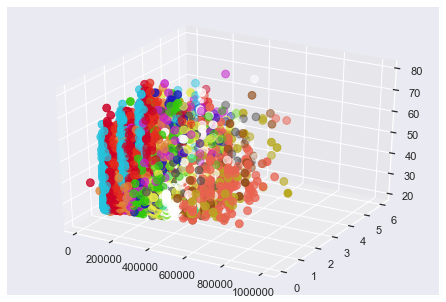

In [29]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['#32c909','#e52d1d','#1d17ba','#e96350','#e4e846','#4f4f4f','#c720ce','#25c3dd','#e08538','#914a17',
         '#ffffff','#b8a91d','#78de2a','#31df90','#cc0026']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [30]:
copy =  pd.DataFrame()
copy['ID']=CC_data['ID'].values
copy['default payment next month']=CC_data['default payment next month'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,#32c909,3632
1,#e52d1d,2705
2,#1d17ba,1134
3,#e96350,1046
4,#e4e846,2077
5,#4f4f4f,595
6,#c720ce,2176
7,#25c3dd,4187
8,#e08538,3259
9,#914a17,326


In [31]:
group_referrer_index = copy['label'] ==1
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Pagar']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('default payment next month').size()
diversidadGrupo

,Pagar,cantidad
0,0,2017
1,1,688


In [32]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([  767, 21815, 22237, 17721, 26812,  5417,  6577, 29671,     8,
        3608,  1272, 10997, 12459, 29423, 15665], dtype=int64)

In [33]:
users=CC_data['ID'].values
for row in closest:
    print(users[row])

768
21816
22238
17722
26813
5418
6578
29672
9
3609
1273
10998
12460
29424
15666


# k=20

In [34]:
kmeans = KMeans(n_clusters=20).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 5.69816909e+04  2.05492730e+00  3.48976844e+01  4.31071621e-01
   4.67352526e+04  2.73143484e+03]
 [ 3.08847352e+05  1.69937695e+00  3.61947040e+01  7.63239875e-02
   1.30282430e+05  9.70119782e+03]
 [ 2.80304372e+05  1.61095739e+00  3.70154953e+01 -6.72385169e-01
   1.12361987e+04  5.18184062e+03]
 [ 6.59324324e+05  1.60810811e+00  3.88243243e+01 -5.40540541e-01
   6.26379189e+04  1.39159189e+04]
 [ 3.89991564e+05  1.71636364e+00  3.89272727e+01  3.23636364e-01
   3.63569349e+05  1.72374473e+04]
 [ 1.56839873e+05  1.74549311e+00  3.49056204e+01 -4.53517144e-01
   1.06831425e+04  4.51584624e+03]
 [ 3.05048681e+04  2.07116304e+00  3.37835015e+01  3.72455302e-01
   1.29491793e+04  2.29170313e+03]
 [ 4.14710234e+05  1.50554871e+00  3.69987670e+01 -6.43649815e-01
   2.27986819e+04  9.57762145e+03]
 [ 1.45814448e+05  1.99079320e+00  3.56805949e+01  3.63314448e-01
   1.29649304e+05  6.46961261e+03]
 [ 9.48654514e+04  1.87673611e+00  3.43515625e+01 -1.39322917e-01
   1.09511836e+04  3.9664

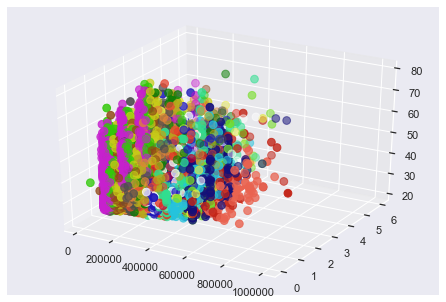

In [35]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['#32c909','#e52d1d','#1d17ba','#e96350','#e4e846','#4f4f4f','#c720ce','#25c3dd','#e08538','#914a17',
         '#ffffff','#b8a91d','#78de2a','#31df90','#cc0026','#0d7f05','#c32518','#130f7a','#e54933','#c8cc19'
        ]
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [36]:
copy =  pd.DataFrame()
copy['ID']=CC_data['ID'].values
copy['default payment next month']=CC_data['default payment next month'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,#32c909,3714
1,#e52d1d,640
2,#1d17ba,1807
3,#e96350,74
4,#e4e846,275
5,#4f4f4f,2831
6,#c720ce,5649
7,#25c3dd,811
8,#e08538,1410
9,#914a17,2305


In [37]:
group_referrer_index = copy['label'] ==2
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Pagar']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('default payment next month').size()
diversidadGrupo

,Pagar,cantidad
0,0,1555
1,1,252


In [38]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 1380, 27874, 29438, 26176, 29020, 20488,   950, 21118,  5498,
       25216, 10549, 19307,  3608, 24783,  1065, 15928, 24262, 17721,
       29122,   782], dtype=int64)

In [39]:
users=CC_data['ID'].values
for row in closest:
    print(users[row])

1381
27875
29439
26177
29021
20489
951
21119
5499
25217
10550
19308
3609
24784
1066
15929
24263
17722
29123
783


# k=25

In [40]:
kmeans = KMeans(n_clusters=25).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.55685950e+05  1.58677686e+00  3.75677686e+01 -6.80165289e-01
   9.26323719e+03  6.17515620e+03]
 [ 1.41492754e+05  1.74492754e+00  3.46434783e+01 -4.60386473e-01
   6.92770676e+03  4.53900773e+03]
 [ 3.62661597e+05  1.70342205e+00  3.67680608e+01  1.29277567e-01
   2.00127985e+05  1.22929886e+04]
 [ 1.48804243e+05  1.96817743e+00  3.55207329e+01  3.83799421e-01
   1.34102626e+05  6.72295275e+03]
 [ 8.54571565e+04  1.91479177e+00  3.42249880e+01 -9.95691719e-02
   1.03653006e+04  4.25738152e+03]
 [ 5.23690060e+04  2.07113369e+00  3.50203239e+01  4.45220705e-01
   4.32269070e+04  2.63723849e+03]
 [ 2.38814554e+05  1.61971831e+00  3.67670188e+01 -5.99178404e-01
   9.12792547e+03  4.41709918e+03]
 [ 4.96666667e+05  1.49563046e+00  3.96204744e+01 -7.05368290e-01
   2.26380824e+04  1.18876542e+04]
 [ 2.54976526e+05  1.83098592e+00  3.72331768e+01  3.06729264e-01
   2.17371394e+05  9.54609859e+03]
 [ 4.35714286e+05  1.67619048e+00  3.90761905e+01  2.85714286e-01
   3.92632948e+05  1.7648

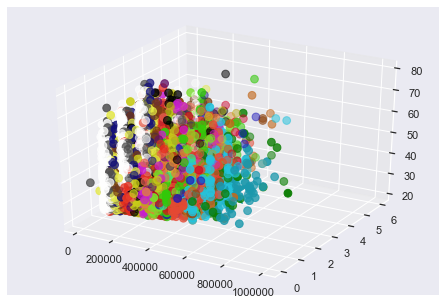

In [41]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['#32c909','#e52d1d','#1d17ba','#e96350','#e4e846','#4f4f4f','#c720ce','#25c3dd','#e08538','#914a17',
         '#ffffff','#b8a91d','#78de2a','#31df90','#cc0026','#0d7f05','#c32518','#130f7a','#e54933','#c8cc19',
         '#000000','#621066','#1b98ac','#c2691e','#773d13']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [42]:
copy =  pd.DataFrame()
copy['ID']=CC_data['ID'].values
copy['default payment next month']=CC_data['default payment next month'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,#32c909,1210
1,#e52d1d,2070
2,#1d17ba,263
3,#e96350,1037
4,#e4e846,2090
5,#4f4f4f,3149
6,#c720ce,1704
7,#25c3dd,801
8,#e08538,639
9,#914a17,210


In [43]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Pagar']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('default payment next month').size()
diversidadGrupo

,Pagar,cantidad
0,0,1015
1,1,195


In [44]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([18688, 20593, 28708,  7256, 13102, 11886,  5103, 17721, 15254,
       20053,   950, 16196, 28174,  1065, 16533, 26872, 24539,  3983,
       20109, 12207,  1120,  4790, 26176, 15124,  9975], dtype=int64)

In [45]:
users=CC_data['ID'].values
for row in closest:
    print(users[row])

18689
20594
28709
7257
13103
11887
5104
17722
15255
20054
951
16197
28175
1066
16534
26873
24540
3984
20110
12208
1121
4791
26177
15125
9976


# k=30

In [46]:
kmeans = KMeans(n_clusters=30).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.98712059e+05  1.62715340e+00  3.60045119e+01 -6.11156686e-01
   7.50315956e+03  4.06575144e+03]
 [ 5.42344498e+04  2.07177033e+00  3.50864662e+01  4.52494874e-01
   4.64426169e+04  2.64524334e+03]
 [ 4.17300435e+05  1.47895501e+00  3.72844702e+01 -7.48911466e-01
   1.34378911e+04  8.74907402e+03]
 [ 2.77906977e+05  1.81136951e+00  3.72919897e+01  3.04909561e-01
   2.64485935e+05  1.12843333e+04]
 [ 1.76743119e+05  1.92087156e+00  3.59392202e+01  3.16513761e-01
   1.55262367e+05  7.91193578e+03]
 [ 4.51283784e+05  1.65540541e+00  3.89121622e+01  2.83783784e-01
   4.28963865e+05  2.28663514e+04]
 [ 2.97754415e+05  1.59798150e+00  3.68797309e+01 -8.00672834e-01
   7.58487216e+03  5.64852817e+03]
 [ 1.22609971e+05  1.79569892e+00  3.39657869e+01 -1.77908113e-01
   1.09318954e+04  4.86443304e+03]
 [ 1.29752981e+05  1.98296422e+00  3.53134583e+01  3.79045997e-01
   1.18241630e+05  5.75782198e+03]
 [ 2.26979269e+04  2.11204344e+00  3.36742349e+01  4.85686081e-01
   1.43358554e+04  1.9047

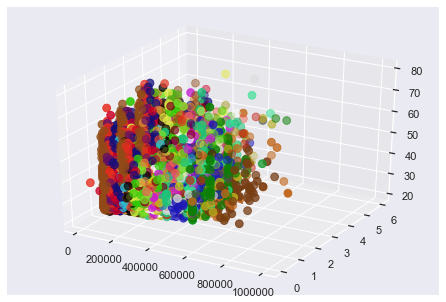

In [47]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['#32c909','#e52d1d','#1d17ba','#e96350','#e4e846','#4f4f4f','#c720ce','#25c3dd','#e08538','#914a17',
         '#ffffff','#b8a91d','#78de2a','#31df90','#cc0026','#0d7f05','#c32518','#130f7a','#e54933','#c8cc19',
         '#000000','#621066','#1b98ac','#c2691e','#773d13','#dbdbdb','#a3961a','#5cb11b','#1ec278','#7b0017']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [48]:
copy =  pd.DataFrame()
copy['ID']=CC_data['ID'].values
copy['default payment next month']=CC_data['default payment next month'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,#32c909,2438
1,#e52d1d,2926
2,#1d17ba,689
3,#e96350,388
4,#e4e846,870
5,#4f4f4f,148
6,#c720ce,1189
7,#25c3dd,1020
8,#e08538,1176
9,#914a17,4052


In [49]:
group_referrer_index = copy['label'] ==28
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Pagar']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('default payment next month').size()
diversidadGrupo

,Pagar,cantidad
0,0,975
1,1,195


In [50]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([22770, 29401, 15083, 22270,  8488, 24103, 14663, 19102, 23025,
       29671,  4526, 22697,  9360, 15463, 25216, 11133, 23316,  6002,
        4790, 22369, 12185, 27594,  1065, 20892, 26176, 18120, 19894,
       10478, 12055, 20169], dtype=int64)

In [51]:
users=CC_data['ID'].values
for row in closest:
    print(users[row])

22771
29402
15084
22271
8489
24104
14664
19103
23026
29672
4527
22698
9361
15464
25217
11134
23317
6003
4791
22370
12186
27595
1066
20893
26177
18121
19895
10479
12056
20170
